# Calculate information quantities with causal perturbation

#### Causal perturbations can be introduced in the system to disentangle steady-state and dynamical statistical dependencies between variables. 

#### Here causal perturbation is implemented by introducing a maximum entropy distribution with fixed marginals in the sources, then letting the system evolve according to its original dynamics. 

#### This approach shows that it can distinguish between _source_ and _mechanistic_ redundancy (see below).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from InfoDyn.InfoCalculator import Info_calculator

In [2]:
def plot_sweeps(rs, red1, red2, syn1, syn2):

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(rs, red1, label="Original system")
    plt.plot(rs, red2, label="Perturbed system")
    plt.title("Redundancy")
    plt.xlabel("Correlation between sources")
    plt.ylabel("Information (bits)")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(rs, syn1, label="Original system")
    plt.plot(rs, syn2, label="Perturbed system")
    plt.title("Synergy")
    plt.xlabel("Correlation between sources")
    plt.ylabel("Information (bits)")
    plt.legend()   

def plot_heatmaps(red1, red2, syn1, syn2):
    plt.figure(figsize=(12,10))
    plt.subplot(2,2,1)
    plt.imshow(red1, origin='lower', extent=[0,0.99,0,0.99], aspect='auto')
    plt.colorbar(label='Redundancy (bits)')
    plt.xlabel('Correlation between sources')
    plt.ylabel('Correlation to target')
    plt.title('Redundancy - Original system')

    plt.subplot(2,2,2)
    plt.imshow(red2, origin='lower', extent=[0,0.99,0,0.99], aspect='auto')
    plt.colorbar(label='Redundancy (bits)')
    plt.xlabel('Correlation between sources')
    plt.ylabel('Correlation to target')
    plt.title('Redundancy - Perturbed system')  

    plt.subplot(2,2,3)
    plt.imshow(syn1, origin='lower', extent=[0,0.99,0,0.99], aspect='auto')
    plt.colorbar(label='Synergy (bits)')
    plt.xlabel('Correlation between sources')
    plt.ylabel('Correlation to target')
    plt.title('Synergy - Original system')  

    plt.subplot(2,2,4)
    plt.imshow(syn2, origin='lower', extent=[0,0.99,0,0.99], aspect='auto')
    plt.colorbar(label='Synergy (bits)')
    plt.xlabel('Correlation between sources')
    plt.ylabel('Correlation to target')
    plt.title('Synergy - Perturbed system')

    plt.tight_layout()
    plt.show()

In [ ]:
cov = np.random.rand(4,4)
cov = cov @ cov.T

# instantiate Info_calculator object from covariance matrix
infocalc = Info_calculator(cov, model="Gauss")

# to apply causal perturbations, simply set pert=True in the desired information measure 
PID_pert = infocalc.PID([0], [1], [0,1], as_dict=False, red_fun="MMI", pert=True, cut="full")
print("\nPerturbed PID from [0] and [1] to [0,1]:", PID_pert)

# compare with the original PID
PID_og = infocalc.PID([0], [1], [0,1], as_dict=False, red_fun="MMI")
print("Original PID from [0] and [1] to [0,1]:", PID_og)

print("\nIn the perturbed system source redundancy is 0 and hence the overall redundancy decreases.")

## Model with _source redundancy_ only

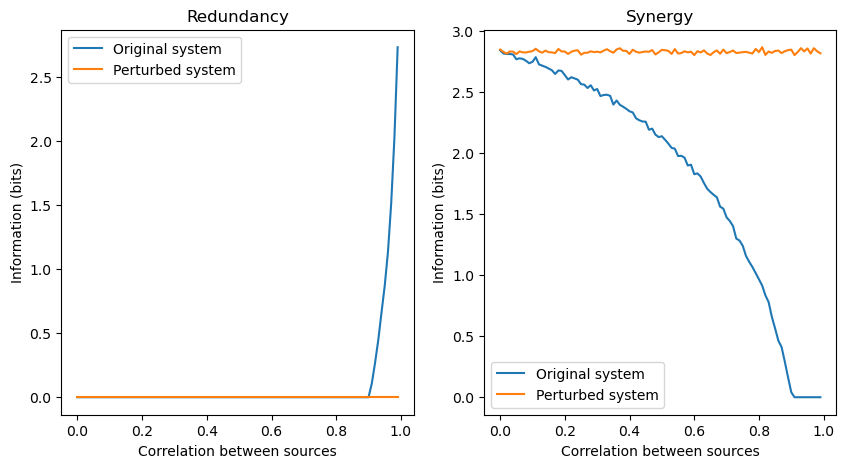

In [ ]:
def eps(N):
    return 0.1 * np.random.randn(N)


M = 10000
red_fun = "MMI"

red1 = []; syn1 = []
red2 = []; syn2 = []
rs = np.linspace(0,0.99,100)
for r in rs:
    X12 = np.random.multivariate_normal([0,0],[[1, r],[r, 1]],M)
    X1 = X12[:,0]
    X2 = X12[:,1]
    Y1 = eps(M)
    Y2 = X1 + X2 - Y1 + eps(M)

    cov = np.cov([X1, X2, Y1, Y2])
    infocalc = Info_calculator(cov, model="Gauss", p=1, detrend=True, verbose=False)
    pids1 = infocalc.PID([0],[1], [0, 1], red_fun=red_fun)
    pids2 = infocalc.PID([0],[1], [0,1], pert=True, red_fun=red_fun)
    red1.append(pids1[0]); syn1.append(pids1[3])
    red2.append(pids2[0]); syn2.append(pids2[3])

plot_sweeps(rs, red1, red2, syn1, syn2)

## Model with _mechanistic redundancy_ only

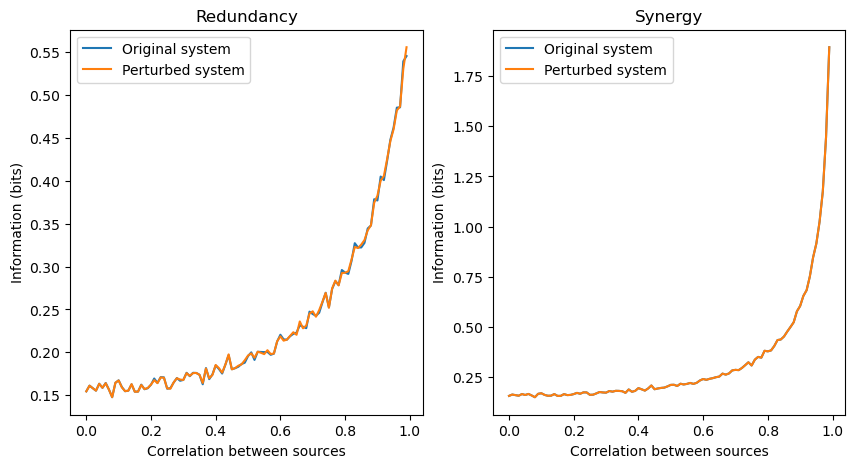

In [ ]:
def eps(N):
    return 0.1 * np.random.randn(N)


M = 10000

red1 = []; syn1 = []
red2 = []; syn2 = []
rs = np.linspace(0,0.99,100)
for r in rs:
    X12 = np.random.multivariate_normal([0,0],[[1, 0],[0, 1]],M)
    X1 = X12[:,0]
    X2 = X12[:,1]
    Y12 = np.random.multivariate_normal([0,0],[[1, r],[r, 1]],M) + 0.5*X12
    Y1 = Y12[:,0]
    Y2 = Y12[:,1]

    cov = np.cov([X1, X2, Y1, Y2])
    infocalc = Info_calculator(cov, model="Gauss", p=1, detrend=True, verbose=False)
    pids1 = infocalc.PID([0],[1], [0, 1])
    pids2 = infocalc.PID([0],[1], [0,1], pert=True)
    red1.append(pids1[0]); syn1.append(pids1[3])
    red2.append(pids2[0]); syn2.append(pids2[3])

plot_sweeps(rs, red1, red2, syn1, syn2)

## Model with both _source redundancy_ and _mechanistic redundancy_

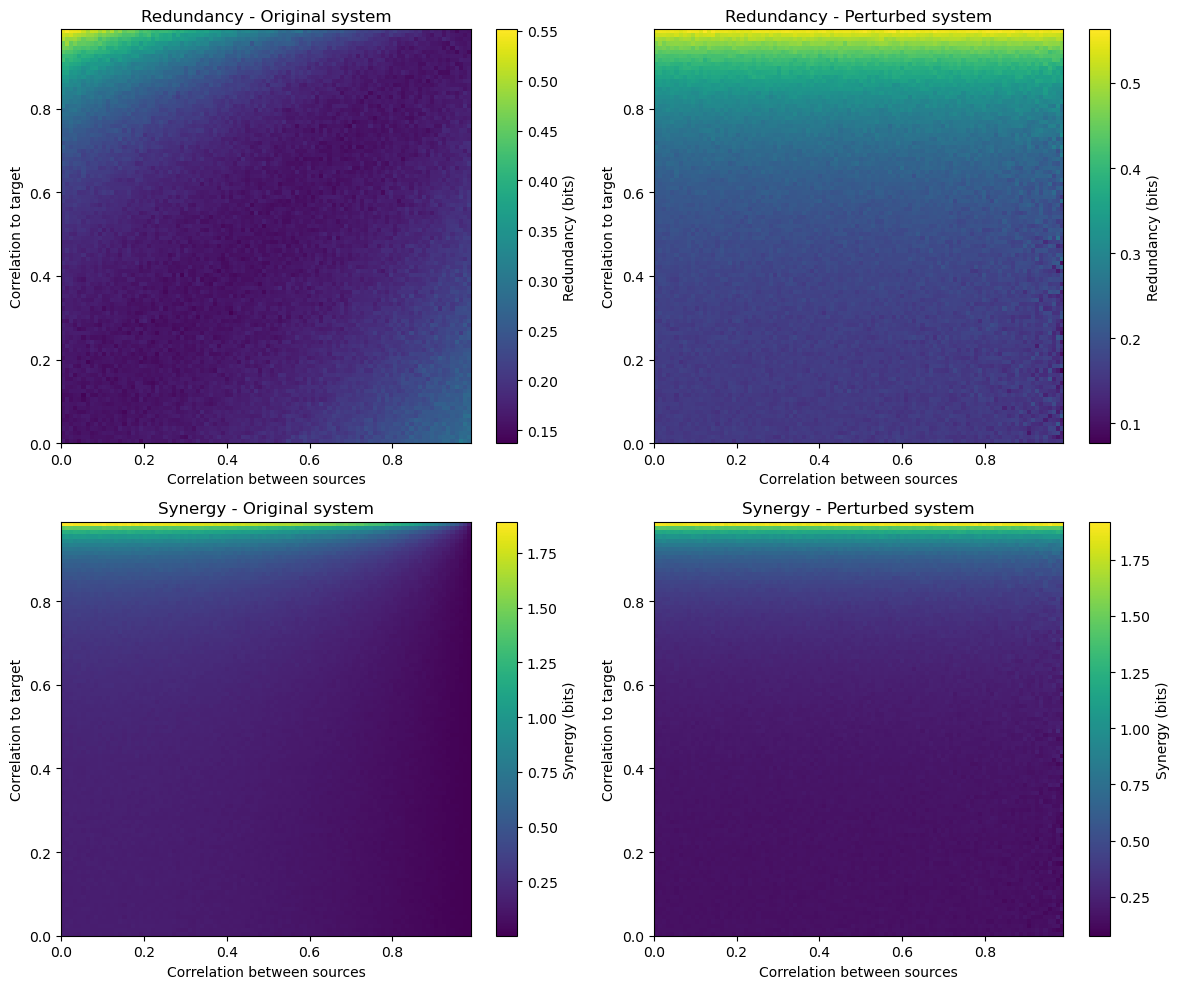

In [ ]:
def eps(N):
    return 0.1 * np.random.randn(N)

M = 10000

red1 = np.ones((100,100))*np.nan; syn1 = np.ones((100,100))*np.nan
red2 = np.ones((100,100))*np.nan; syn2 = np.ones((100,100))*np.nan
rts = np.linspace(0,0.99,100)
rss = np.linspace(0,0.99,100)
for i, rt in enumerate(rts):
    for j, rs in enumerate(rss):
        X12 = np.random.multivariate_normal([0,0],[[1, rs],[rs, 1]],M)
        X1 = X12[:,0]
        X2 = X12[:,1]
        Y12 = np.random.multivariate_normal([0,0],[[1, rt],[rt, 1]],M) + 0.5*X12
        Y1 = Y12[:,0]
        Y2 = Y12[:,1]

        cov = np.cov([X1, X2, Y1, Y2])
        infocalc = Info_calculator(cov, model="Gauss", p=1, detrend=True, verbose=False)
        pids1 = infocalc.PID([0],[1], [0, 1])
        pids2 = infocalc.PID([0],[1], [0,1], pert=True)
        red1[i,j] = pids1[0]; syn1[i,j] = pids1[3]
        red2[i,j] = pids2[0]; syn2[i,j] = pids2[3]

plot_heatmaps(red1, red2, syn1, syn2)

## Perturbations on models with memory

#### When dealing with a VAR(p) model (p>1), one wants to retain the correlations between the past of one variables, destroying all the rest. We do this by setting cut="partial" and specifying the sources.

In [ ]:
cov = np.random.rand(6,6)
cov = cov @ cov.T  

# instantiate Info_calculator object from covariance matrix
# 2 sources and 2 past lags
infocalc = Info_calculator(cov, model="VAR", p=2)

PID_og = infocalc.PID([0], [1], [0,1], as_dict=False, red_fun="MMI")
PID_pert = infocalc.PID([0], [1], [0,1], as_dict=False, red_fun="MMI", pert=True, cut="partial", ps=[[0], [1]])

print("Original PID from [0,1] and [2] to [2]:", PID_og)
print("Perturbed PID from [0,1] and [2] to [2]:", PID_pert)

print("\nThe causal perturbation preserves the correlations within the past of each source:")
print("{Ordering of the covariance is [X1(t+1), X2(t-1), X1(t-2), X2(t-2)]}")
print(infocalc.pert_cov[:4, :4])
